<div>
  <h1>Foodpanda Customer Churn Analysis</h1>
</div>

---
Data được lấy từ Kaggle: https://www.kaggle.com/datasets/nabihazahid/foodpanda-analysis-dataset-2025/data

**Mục tiêu:**  
- Khám phá dữ liệu khách hàng Foodpanda 2025  
- Hiểu hành vi đặt hàng, đánh giá, loyalty points
- Phân tích churn: những khách hàng nào có khả năng rời bỏ
- Chuẩn bị dữ liệu cho Data Warehouse (Fact/Dimension) và Power BI Dashboard.

# 1. Import Libraries and Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

file_path = '/content/drive/MyDrive/FoodPanda Dataset/Foodpanda Analysis Dataset.csv'

df = pd.read_csv(file_path)

In [4]:
df.head()

,customer_id,gender,age,city,signup_date,order_id,order_date,restaurant_name,dish_name,category,quantity,price,payment_method,order_frequency,last_order_date,loyalty_points,churned,rating,rating_date,delivery_status
0,C5663,Male,Adult,Peshawar,1/14/2024,O9663,8/23/2023,McDonald's,Burger,Italian,5,1478.27,Cash,38,7/19/2025,238,Active,NaN,10/14/2024,Cancelled
1,C2831,Male,Adult,Multan,7/7/2024,O6831,8/23/2023,KFC,Burger,Italian,3,956.04,Wallet,24,11/25/2024,81,Active,2.0,8/21/2025,Delayed
2,C2851,Other,Senior,Multan,6/20/2025,O6851,8/23/2023,Pizza Hut,Fries,Italian,2,882.51,Cash,42,5/10/2025,82,Inactive,3.0,9/19/2024,Delayed
3,C1694,Female,Senior,Peshawar,9/5/2023,O5694,8/23/2023,Subway,Pizza,Dessert,4,231.30,Card,27,7/24/2025,45,Inactive,2.0,6/29/2025,Delayed
4,C4339,Other,Senior,Lahore,12/29/2023,O8339,8/24/2023,KFC,Sandwich,Dessert,1,1156.69,Cash,35,12/21/2024,418,Inactive,NaN,3/6/2025,Cancelled


# 2. Overview

In [6]:
df.shape

(6000, 20)

In [7]:
df.head(100)

,customer_id,gender,age,city,signup_date,order_id,order_date,restaurant_name,dish_name,category,quantity,price,payment_method,order_frequency,last_order_date,loyalty_points,churned,rating,rating_date,delivery_status
0,C5663,Male,Adult,Peshawar,1/14/2024,O9663,8/23/2023,McDonald's,Burger,Italian,5,1478.27,Cash,38,7/19/2025,238,Active,NaN,10/14/2024,Cancelled
1,C2831,Male,Adult,Multan,7/7/2024,O6831,8/23/2023,KFC,Burger,Italian,3,956.04,Wallet,24,11/25/2024,81,Active,2.0,8/21/2025,Delayed
2,C2851,Other,Senior,Multan,6/20/2025,O6851,8/23/2023,Pizza Hut,Fries,Italian,2,882.51,Cash,42,5/10/2025,82,Inactive,3.0,9/19/2024,Delayed
3,C1694,Female,Senior,Peshawar,9/5/2023,O5694,8/23/2023,Subway,Pizza,Dessert,4,231.30,Card,27,7/24/2025,45,Inactive,2.0,6/29/2025,Delayed
4,C4339,Other,Senior,Lahore,12/29/2023,O8339,8/24/2023,KFC,Sandwich,Dessert,1,1156.69,Cash,35,12/21/2024,418,Inactive,NaN,3/6/2025,Cancelled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,C5122,Other,Senior,Multan,3/30/2025,O9122,9/3/2023,McDonald's,Pizza,Chinese,3,1201.49,Cash,37,4/30/2025,293,Active,1.0,11/30/2024,Delayed
96,C6532,Female,Senior,Islamabad,3/15/2024,O10532,9/3/2023,Pizza Hut,Pizza,Dessert,4,579.72,Wallet,40,7/14/2025,170,Inactive,3.0,2/6/2025,Delayed
97,C1833,Other,Adult,Peshawar,6/6/2025,O5833,9/3/2023,KFC,Burger,Chinese,4,599.35,Cash,3,4/8/2025,322,Inactive,NaN,1/15/2025,Cancelled
98,C2040,Male,Senior,Peshawar,2/7/2024,O6040,9/3/2023,Burger King,Pasta,Fast Food,4,1418.27,Wallet,14,5/18/2025,291,Inactive,NaN,2/10/2025,Cancelled


In [8]:
df.columns

Index(['customer_id', 'gender', 'age', 'city', 'signup_date', 'order_id',
       'order_date', 'restaurant_name', 'dish_name', 'category', 'quantity',
       'price', 'payment_method', 'order_frequency', 'last_order_date',
       'loyalty_points', 'churned', 'rating', 'rating_date',
       'delivery_status'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      6000 non-null   object 
 1   gender           6000 non-null   object 
 2   age              6000 non-null   object 
 3   city             6000 non-null   object 
 4   signup_date      6000 non-null   object 
 5   order_id         6000 non-null   object 
 6   order_date       6000 non-null   object 
 7   restaurant_name  6000 non-null   object 
 8   dish_name        6000 non-null   object 
 9   category         6000 non-null   object 
 10  quantity         6000 non-null   int64  
 11  price            6000 non-null   float64
 12  payment_method   6000 non-null   object 
 13  order_frequency  6000 non-null   int64  
 14  last_order_date  6000 non-null   object 
 15  loyalty_points   6000 non-null   int64  
 16  churned          6000 non-null   object 
 17  rating        

# 3. Missing value

Mục tiêu:
- Xác định các cột có missing values
- Đánh giá tỷ lệ missing (%)
- Quyết định cách xử lý missing trước khi phân tích chi tiết

In [12]:
# số lượng missing mỗi cột
df.isnull().sum()

,0
customer_id,0
gender,0
age,0
city,0
signup_date,0
order_id,0
order_date,0
restaurant_name,0
dish_name,0
category,0


In [13]:
#tỷ lệ missing
df.isnull().sum() / len(df) * 100

,0
customer_id,0.0
gender,0.0
age,0.0
city,0.0
signup_date,0.0
order_id,0.0
order_date,0.0
restaurant_name,0.0
dish_name,0.0
category,0.0


Tỷ lệ missing rating khoảng 33% -> giữ nguyên tránh bias

# 4. Customer Overview

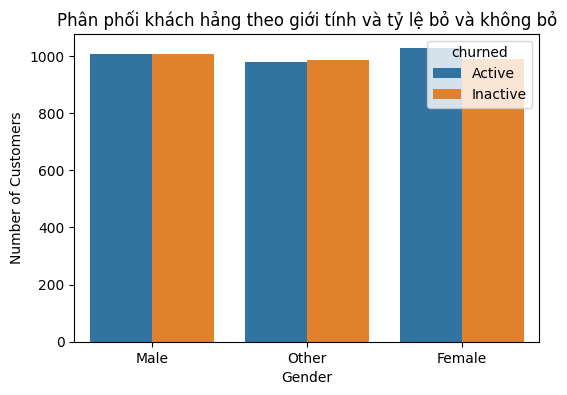

In [17]:
# phân phối theo giới tính
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='gender', hue='churned')
plt.title('Phân phối khách hảng theo giới tính và tỷ lệ bỏ và không bỏ')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()

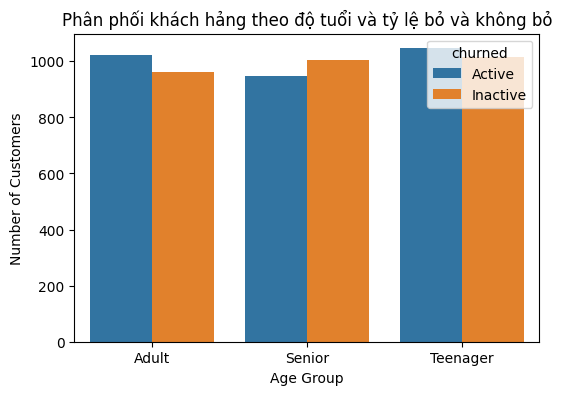

In [18]:
# phân phối theo độ tuổi
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='age', hue='churned')
plt.title('Phân phối khách hảng theo độ tuổi và tỷ lệ bỏ và không bỏ')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.show()

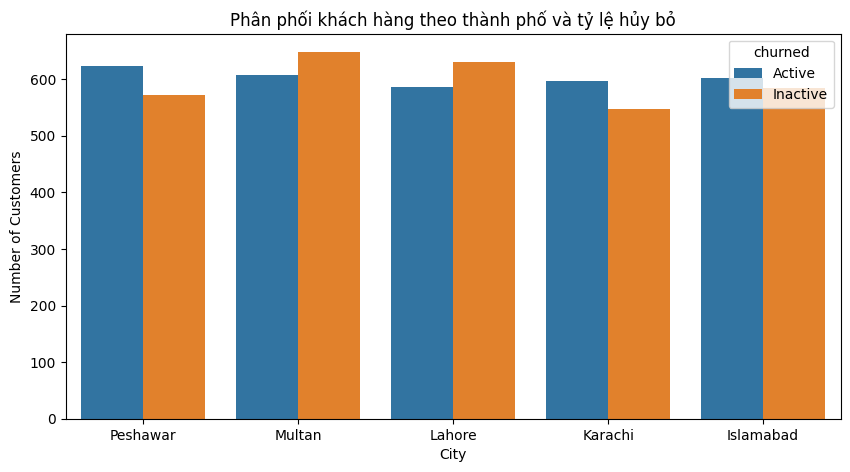

In [19]:
# phân phối theo thành phố
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='city', hue='churned')
plt.title('Phân phối khách hàng theo thành phố và tỷ lệ hủy bỏ')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.show()

# 5: Order / Customer Behavior

Mục tiêu:
- Hiểu hành vi mua hàng của khách hàng
- Phân tích các chỉ số: `order_frequency`, `loyalty_points`, `price`
- So sánh hành vi giữa khách Active và Inactive

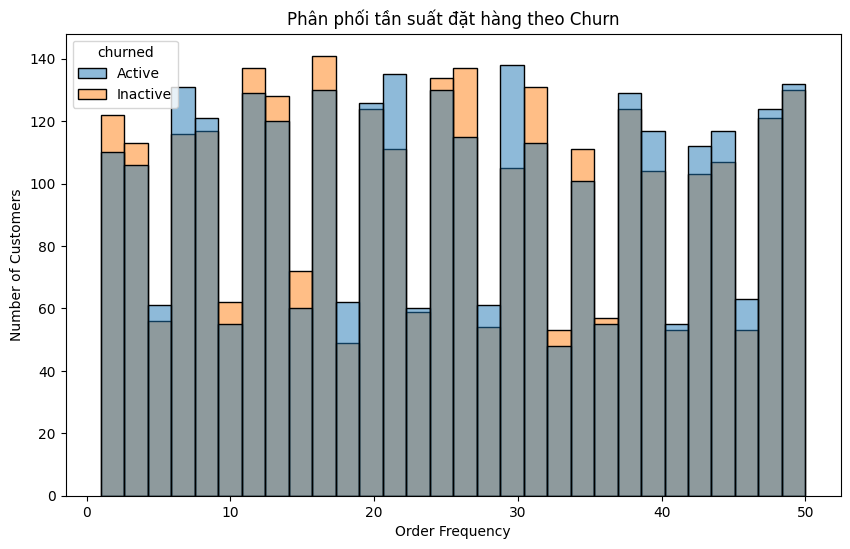

In [25]:
# tần suất đặt hàng
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='order_frequency', hue='churned', bins=30, kde=False)
plt.title('Phân phối tần suất đặt hàng theo Churn')
plt.xlabel('Order Frequency')
plt.ylabel('Number of Customers')
plt.show()

Có thể thấy những khách hàng có số lượng đặt hàng > 38 lần sẽ vẫn sử dụng tiếp dịch vụ

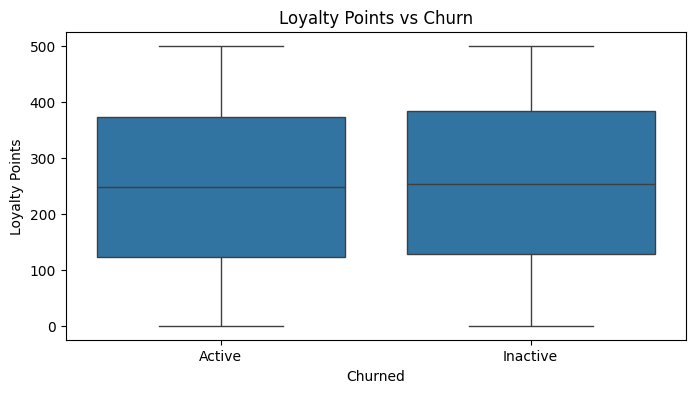

In [26]:
# phân phối điểm loyalty giữa khách Active và Inactive
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='churned', y='loyalty_points')
plt.title('Loyalty Points vs Churn')
plt.xlabel('Churned')
plt.ylabel('Loyalty Points')
plt.show()

Khách hàng Active và Inactive khá đều nhau

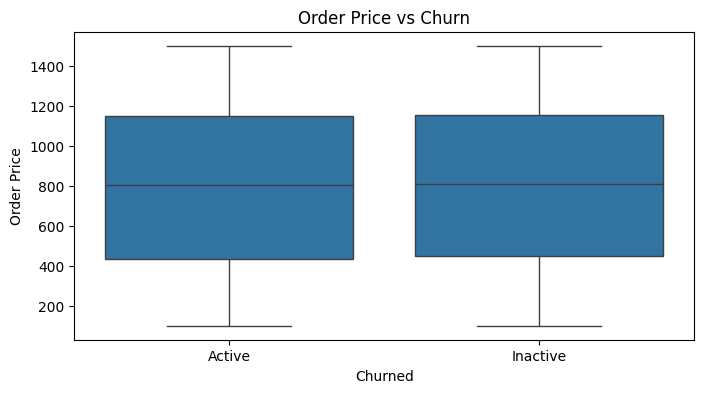

In [28]:
# Tổng giá trị đơn hàng
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='churned', y='price')
plt.title('Order Price vs Churn')
plt.xlabel('Churned')
plt.ylabel('Order Price')
plt.show()


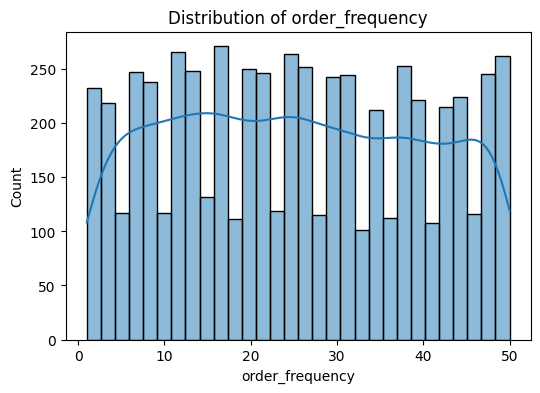

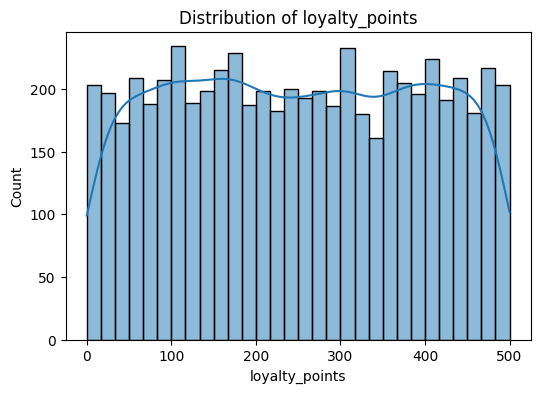

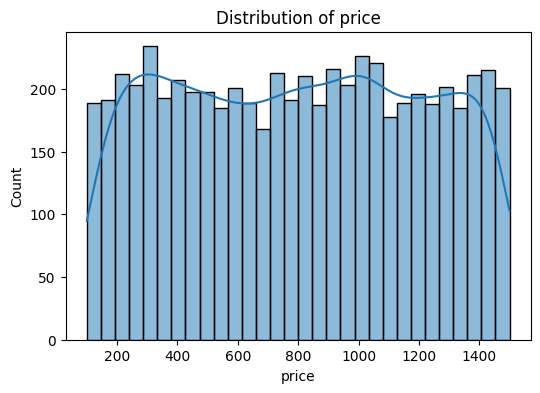

In [29]:
# Histogram tổng quát
numeric_cols = ['order_frequency', 'loyalty_points', 'price']
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


# 6. Rating & Delivery Status Analysis

Mục tiêu:
- Khám phá đánh giá của khách hàng (`rating`) và trạng thái giao hàng (`delivery_status`)
- Xem mối liên hệ giữa rating, delivery status và churn

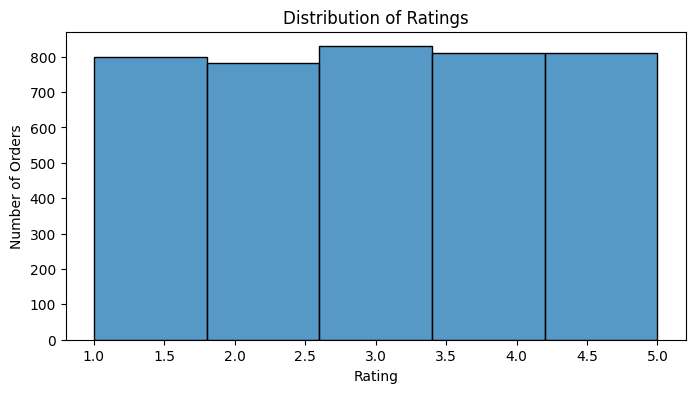

In [33]:
# phân phối đánh giá của khách hàng
df_rating = df[df['rating'].notnull()]

plt.figure(figsize=(8,4))
sns.histplot(df_rating['rating'], bins=5, kde=False)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Orders')
plt.show()


Có thể thấy khách hàng đánh giá điểm đồng đều nhau

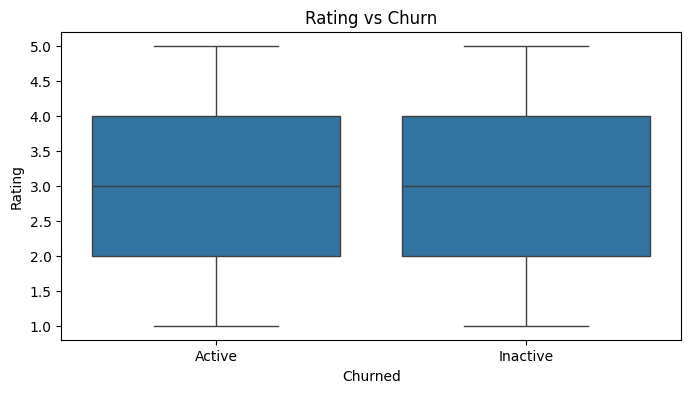

In [34]:
# rating theo churn
plt.figure(figsize=(8,4))
sns.boxplot(data=df_rating, x='churned', y='rating')
plt.title('Rating vs Churn')
plt.xlabel('Churned')
plt.ylabel('Rating')
plt.show()


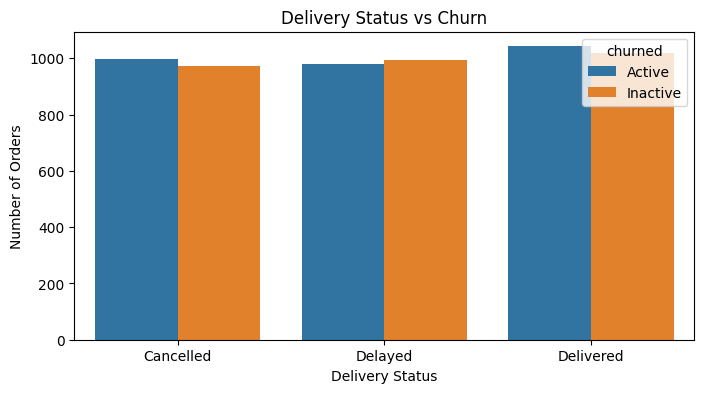

In [36]:
# trạng thái giao hàng
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='delivery_status', hue='churned')
plt.title('Delivery Status vs Churn')
plt.xlabel('Delivery Status')
plt.ylabel('Number of Orders')
plt.show()


- Biểu đồ cho thấy trạng thái giao hàng (Delivered, Cancelled, Delayed)
- Insight:
  - Đơn hàng bị Cancelled và Delayed thường liên quan tới churn
  - Khách hàng nhận hàng đúng hạn dễ giữ trạng thái Active

-> Cải thiện trải nghiệm giao hàng và chăm sóc khách hàng có thể giảm churn

/tmp/ipython-input-2721161793.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_top, x='restaurant_name', y='rating', hue='dish_name', ci=None)


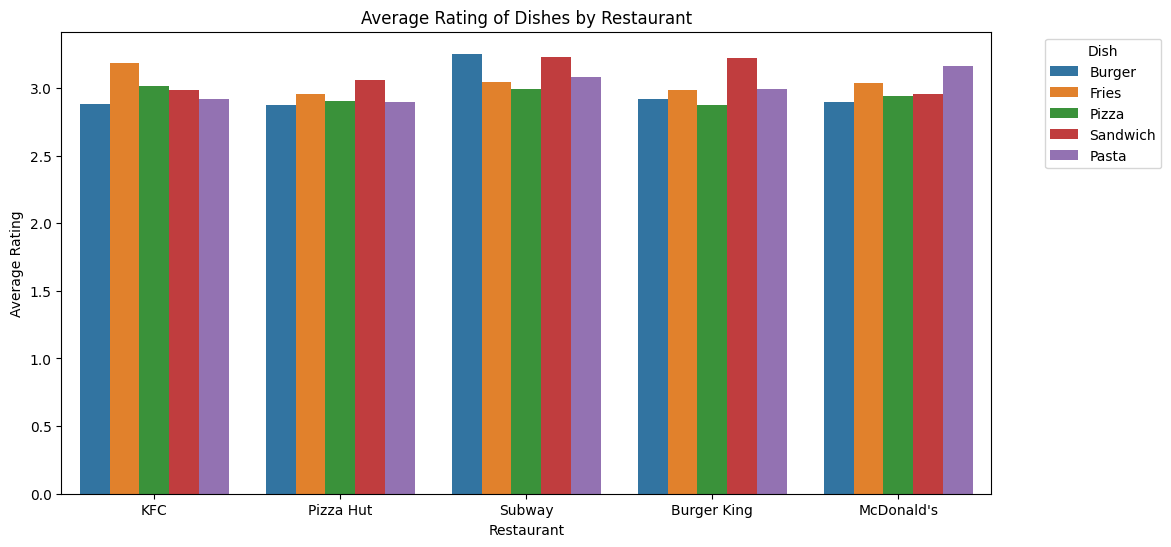

In [42]:
# đánh giá trung bình điểm của từng món ăn trong nhà hàng
df_rating = df[df['rating'].notnull()]

top_restaurants = df['restaurant_name'].value_counts().index
df_top = df_rating[df_rating['restaurant_name'].isin(top_restaurants)]

plt.figure(figsize=(12,6))
sns.barplot(data=df_top, x='restaurant_name', y='rating', hue='dish_name', ci=None)
plt.title('Average Rating of Dishes by Restaurant')
plt.ylabel('Average Rating')
plt.xlabel('Restaurant')
plt.legend(title='Dish', bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()


- Insight:
  - Dễ thấy món nào được đánh giá cao hay thấp trong cùng nhà hàng
  - Giúp nhà quản lý nhận biết món cần cải thiện

# 7. Data Preparation

In [43]:
date_cols = ['signup_date', 'order_date', 'last_order_date', 'rating_date']

for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce').dt.strftime('%Y-%m-%d')

df.rename(columns={
    'customer_id': 'customerId',
    'gender': 'gender',
    'age': 'age',
    'city': 'city',
    'signup_date': 'signupDate',
    'order_id': 'orderId',
    'order_date': 'orderDate',
    'restaurant_name': 'restaurantName',
    'dish_name': 'dishName',
    'category': 'category',
    'quantity': 'quantity',
    'price': 'price',
    'payment_method': 'paymentMethod',
    'order_frequency': 'orderFrequency',
    'last_order_date': 'lastOrderDate',
    'loyalty_points': 'loyaltyPoints',
    'churned': 'churned',
    'rating': 'rating',
    'rating_date': 'ratingDate',
    'delivery_status': 'deliveryStatus'
}, inplace=True)

df.head()

,customerId,gender,age,city,signupDate,orderId,orderDate,restaurantName,dishName,category,quantity,price,paymentMethod,orderFrequency,lastOrderDate,loyaltyPoints,churned,rating,ratingDate,deliveryStatus
0,C5663,Male,Adult,Peshawar,2024-01-14,O9663,2023-08-23,McDonald's,Burger,Italian,5,1478.27,Cash,38,2025-07-19,238,Active,NaN,2024-10-14,Cancelled
1,C2831,Male,Adult,Multan,2024-07-07,O6831,2023-08-23,KFC,Burger,Italian,3,956.04,Wallet,24,2024-11-25,81,Active,2.0,2025-08-21,Delayed
2,C2851,Other,Senior,Multan,2025-06-20,O6851,2023-08-23,Pizza Hut,Fries,Italian,2,882.51,Cash,42,2025-05-10,82,Inactive,3.0,2024-09-19,Delayed
3,C1694,Female,Senior,Peshawar,2023-09-05,O5694,2023-08-23,Subway,Pizza,Dessert,4,231.30,Card,27,2025-07-24,45,Inactive,2.0,2025-06-29,Delayed
4,C4339,Other,Senior,Lahore,2023-12-29,O8339,2023-08-24,KFC,Sandwich,Dessert,1,1156.69,Cash,35,2024-12-21,418,Inactive,NaN,2025-03-06,Cancelled


In [44]:
dimCustomer = df[['customerId','gender','age','signupDate']].drop_duplicates().reset_index(drop=True)
dimCustomer.head()


,customerId,gender,age,signupDate
0,C5663,Male,Adult,2024-01-14
1,C2831,Male,Adult,2024-07-07
2,C2851,Other,Senior,2025-06-20
3,C1694,Female,Senior,2023-09-05
4,C4339,Other,Senior,2023-12-29


In [45]:
dimRestaurant = df[['restaurantName']].drop_duplicates().reset_index(drop=True)
dimRestaurant.head()


,restaurantName
0,McDonald's
1,KFC
2,Pizza Hut
3,Subway
4,Burger King


In [46]:
dimDish = df[['dishName','category','restaurantName']].drop_duplicates().reset_index(drop=True)
dimDish.head()


,dishName,category,restaurantName
0,Burger,Italian,McDonald's
1,Burger,Italian,KFC
2,Fries,Italian,Pizza Hut
3,Pizza,Dessert,Subway
4,Sandwich,Dessert,KFC


In [51]:
dimDate = pd.DataFrame({'date': pd.date_range(start='2023-08-22', end='2025-08-22')})
dimDate['date'] = dimDate['date'].dt.strftime('%Y-%m-%d')

dimDate.head()


,date
0,2023-08-22
1,2023-08-23
2,2023-08-24
3,2023-08-25
4,2023-08-26


In [52]:
factOrders = df[['orderId','customerId','dishName','restaurantName','quantity','price',
                 'paymentMethod','orderFrequency','lastOrderDate','loyaltyPoints',
                 'churned','rating','ratingDate','deliveryStatus','city','orderDate','signupDate']].copy()

factOrders.head()

,orderId,customerId,dishName,restaurantName,quantity,price,paymentMethod,orderFrequency,lastOrderDate,loyaltyPoints,churned,rating,ratingDate,deliveryStatus,city,orderDate,signupDate
0,O9663,C5663,Burger,McDonald's,5,1478.27,Cash,38,2025-07-19,238,Active,NaN,2024-10-14,Cancelled,Peshawar,2023-08-23,2024-01-14
1,O6831,C2831,Burger,KFC,3,956.04,Wallet,24,2024-11-25,81,Active,2.0,2025-08-21,Delayed,Multan,2023-08-23,2024-07-07
2,O6851,C2851,Fries,Pizza Hut,2,882.51,Cash,42,2025-05-10,82,Inactive,3.0,2024-09-19,Delayed,Multan,2023-08-23,2025-06-20
3,O5694,C1694,Pizza,Subway,4,231.30,Card,27,2025-07-24,45,Inactive,2.0,2025-06-29,Delayed,Peshawar,2023-08-23,2023-09-05
4,O8339,C4339,Sandwich,KFC,1,1156.69,Cash,35,2024-12-21,418,Inactive,NaN,2025-03-06,Cancelled,Lahore,2023-08-24,2023-12-29


In [49]:
factOrders.columns

Index(['orderId', 'customerId', 'dishName', 'restaurantName', 'quantity',
       'price', 'paymentMethod', 'orderFrequency', 'lastOrderDate',
       'loyaltyPoints', 'churned', 'rating', 'ratingDate', 'deliveryStatus',
       'city', 'orderDate', 'signupDate', 'signupDateId', 'orderDateId',
       'lastOrderDateId', 'ratingDateId'],
      dtype='object')

In [53]:
import os

path = '/content/drive/MyDrive/FoodPanda Dataset/'
os.makedirs(path, exist_ok=True)

dimCustomer.to_csv(path + 'Customer.csv', index=False)
dimRestaurant.to_csv(path + 'Restaurant.csv', index=False)
dimDish.to_csv(path + 'Dish.csv', index=False)
dimDate.to_csv(path + 'Date.csv', index=False)
factOrders.to_csv(path + 'Orders.csv', index=False)
